In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

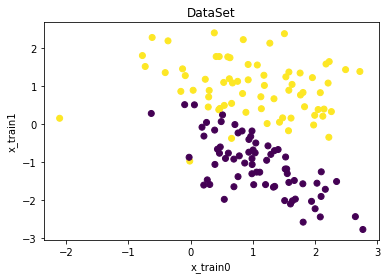

In [3]:
X,Y=datasets.make_classification(n_samples=200,n_classes=2,n_clusters_per_class=1,n_features=2,
                                 n_informative=2
                                 ,n_redundant=0
                                ,n_repeated=0) #(200,2)
x_train,x_test,y_train,y_test= train_test_split(X, Y , test_size=0.3)
c=y_train
plt.figure(0)
plt.title('DataSet')
plt.xlabel('x_train0')
plt.ylabel('x_train1')
plt.scatter(x_train[:,0],x_train[:,1],c=c,marker='o')   

In [4]:
y_train=y_train.reshape(-1,1)
n_input=x_train.shape[1] #feature_number
n_outputs=1
m=x_train.shape[0]   #X(200,2)
learning_rate=0.01
n_epoch=500

In [17]:
#initialization
x_tensor=tf.placeholder(name='x_tensor',dtype=tf.float32,shape=[None,n_input])  #(200,2)
y_tensor=tf.placeholder(name='y_tensor',dtype=tf.float32,shape=[None,1])   #(200,1)
x_tensor.shape
y_tensor.shape
weight=tf.Variable(tf.random_normal(shape=(n_input,n_outputs),mean=0.0,stddev=0.01),name='weight')   #(2,1)
bias=tf.Variable(tf.zeros(shape=([n_outputs]),dtype=tf.float32))  #(1,)
#create model
z=tf.matmul(x_tensor,weight)
model=tf.sigmoid(z)
#loss function
loss_op=-tf.reduce_mean(name='loss',input_tensor= tf.log(model)*y_tensor + tf.log(1-model)*(1-y_tensor))

#training using gradient descent
optimizer=tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_op)

#variables initaialization
init=tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    loss_values=[]  #store loss value each epoch
    for i in range(n_epoch):
        loss_value,_=sess.run([loss_op,optimizer],feed_dict={x_tensor:x_train ,y_tensor:y_train})
        loss_values.append(loss_value)
     #   print(f'loss value : {loss_value}')

    weight,bias= sess.run([weight,bias])
    
        
print("weight = \n", weight, '\n bias =' , bias  ,sep='\n ')  

weight = 

 [[0.08802727]
 [1.2904627 ]]
 
 bias =
 [0.]


TensorShape([])

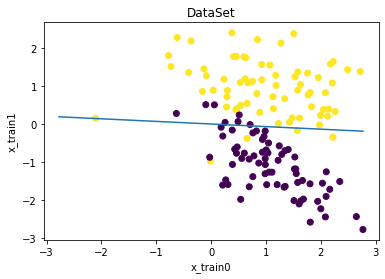

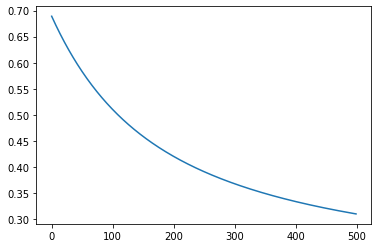

In [22]:
#plot
plt.figure(1)
plt.title('DataSet')
plt.xlabel('x_train0')
plt.ylabel('x_train1')
plt.scatter(x_train[:,0],x_train[:,1],c=c,marker='o')   

x_1 = np.linspace(np.min(x_train),np.max(x_train),x_train.shape[0])
x_2 = -(x_1*weight[0,0]+bias)/weight[1,0]
plt.plot(x_1,x_2);   
plt.figure(2)
plt.plot(loss_values)
plt.show()